<a href="https://colab.research.google.com/github/elmaazouziyassine/Machine_Learning_Python/blob/master/3_Clustering/K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means**



### **Data Preprocessing**




In [0]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [10]:
# Import dataset
dataset = 'https://raw.githubusercontent.com/elmaazouziyassine/Machine_Learning_Python/master/datasets/mall_customers.csv'
data = pd.read_csv(dataset)
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
data.count()

CustomerID                200
Genre                     200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [0]:
# Array of only 2 features : Annual Income & Spending Score
X = data.iloc[:, [3,4]].values

### **Apply the model to the dataset**



**Use the elbow method to find the optimal number of clusters**

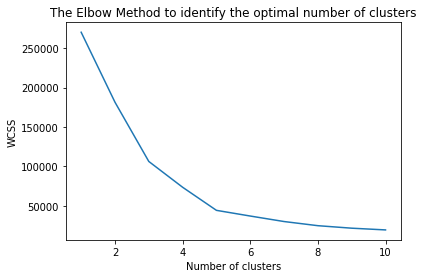

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method to identify the optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Optimal Number of Clusters is 5.

In [14]:
# Apply K-means to the dataset with n_clusters = 5
kmeans = KMeans(n_clusters = 5, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

### **Visualize results**

**Visualize the clusters**

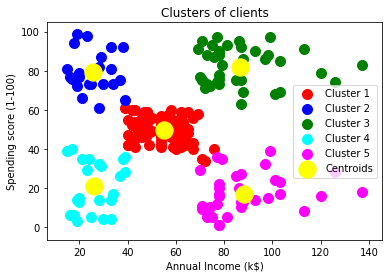

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label = 'Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'Centroids')

plt.title("Clusters of clients")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.show()